datetime64[ns]


C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_4320\2417752186.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


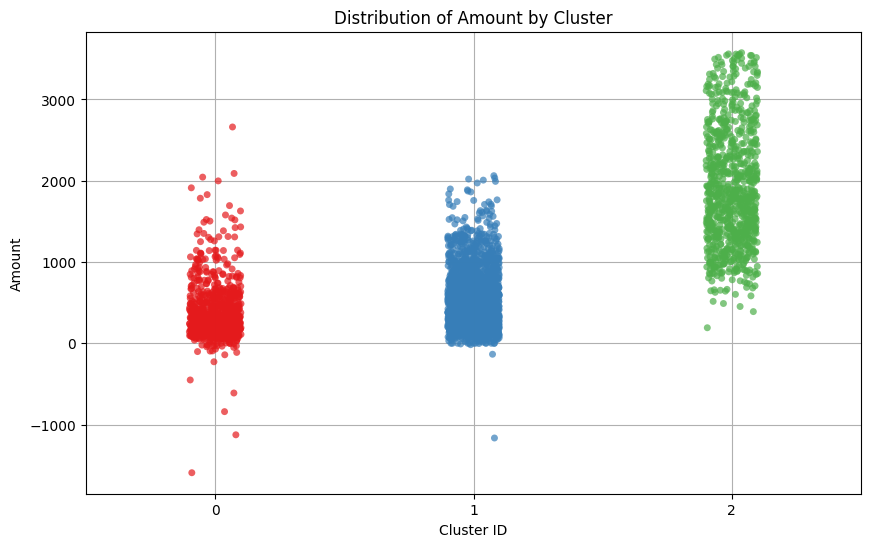

C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_4320\2417752186.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


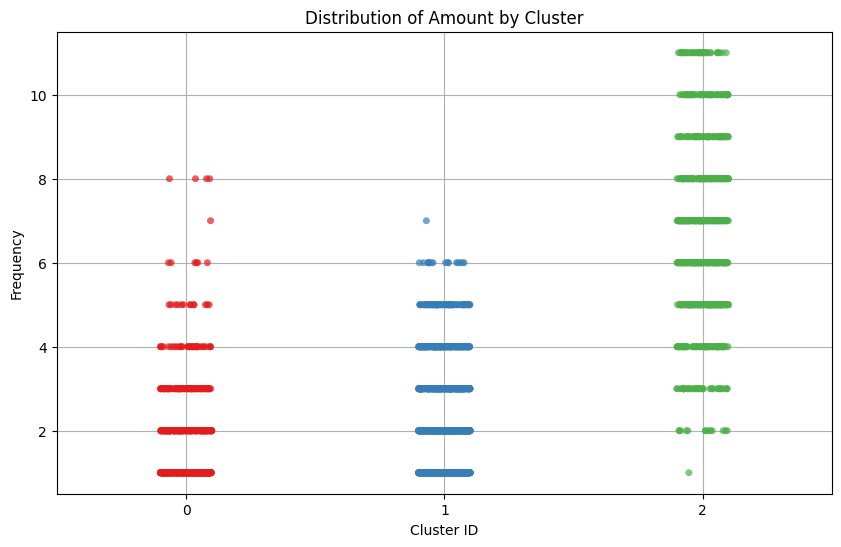

C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_4320\2417752186.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


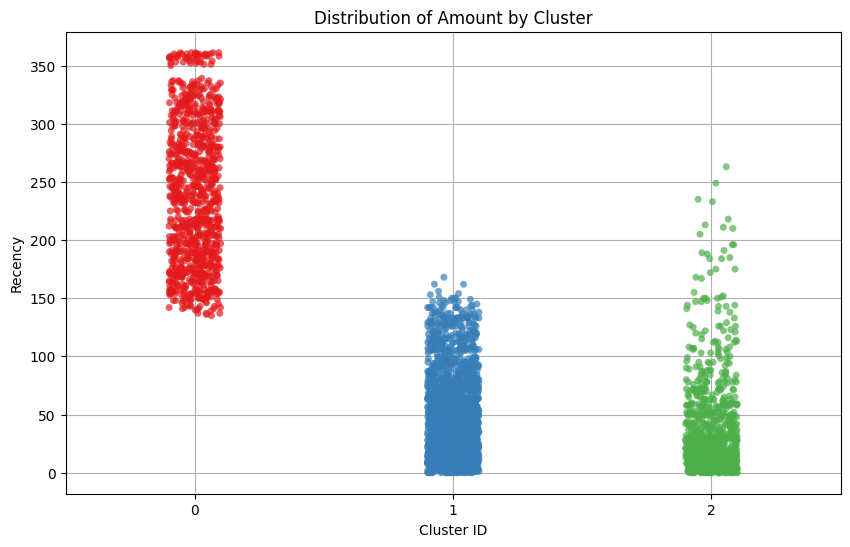

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle
df= pd.read_csv("customerSegmentation.csv", parse_dates=["InvoiceDate"])
print(df["InvoiceDate"].dtype)  # Should now be datetime64[ns]
df['CustomerID'] = df['CustomerID'].astype(str)
df['Description']=df['Description'].fillna(df['Description'].mode()[0])
df=df.drop_duplicates()
df['Amount'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum().reset_index()
recency = df.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (df['InvoiceDate'].max() - x).days).reset_index()
recency.columns = ['CustomerID', 'Recency']
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
rfm= pd.merge(pd.merge(monetary, recency, on='CustomerID', how='inner'), frequency, on='CustomerID', how='inner')
columns = ['Amount', 'Recency', 'Frequency']
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
    
rfm_c = remove_outliers_iqr(rfm, columns)
rfm_unscale = pd.DataFrame(rfm_c)
cols_to_scale = ['Amount', 'Recency', 'Frequency']
scaler = StandardScaler()
rfm_c[cols_to_scale] = scaler.fit_transform(rfm_c[cols_to_scale])
X = rfm_c.drop(columns=['CustomerID'])
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)
rfm_unscale['ClusterId'] = kmeans.predict(X)
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='ClusterId', 
    y='Amount', 
    data=rfm_unscale, 
    palette='Set1', 
    jitter=True, 
    size=5, 
    alpha=0.7
)

plt.title('Distribution of Amount by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Amount')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='ClusterId', 
    y='Frequency', 
    data=rfm_unscale, 
    palette='Set1', 
    jitter=True, 
    size=5, 
    alpha=0.7
)

plt.title('Distribution of Amount by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='ClusterId', 
    y='Recency', 
    data=rfm_unscale, 
    palette='Set1', 
    jitter=True, 
    size=5, 
    alpha=0.7
)

plt.title('Distribution of Amount by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Recency')
plt.grid(True)
plt.show()